<a href="https://colab.research.google.com/github/JheanmarcoOscanoa/Laboratorio-14/blob/main/Laboratorio_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 14: CONCEPTOS PRELIMINARES. MULTICLASIFICADORES

**Autor:** Jheanmarco Oscanoa Vargas  
**Curso:** Minería de Datos  
**Institución:** TECSUP  
**Semana:** 14

---


# a. Preprocesamiento de la información

## a.1 Carga y limpieza inicial del dataset

In [35]:
import pandas as pd
def cargar_datos(ruta):
    """Carga el dataset y elimina la columna 'date'."""
    df = pd.read_csv(ruta)
    df = df.drop(columns=["date"])
    return df

# Uso
ruta = "/content/drive/MyDrive/Ciclo 05/Mineria de Datos/Semana 14/garments_worker_productivity.csv"
data = cargar_datos(ruta)
data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## a.2 Análisis de valores faltantes

In [36]:
def analizar_nulos(df):
    """Muestra el conteo de valores nulos por columna."""
    return df.isnull().sum()

# Mostrar
analizar_nulos(data).sort_values(ascending=False)


,0
wip,506
quarter,0
day,0
team,0
targeted_productivity,0
department,0
smv,0
over_time,0
incentive,0
idle_time,0


## a.3 Análisis univariado de outliers con boxplots

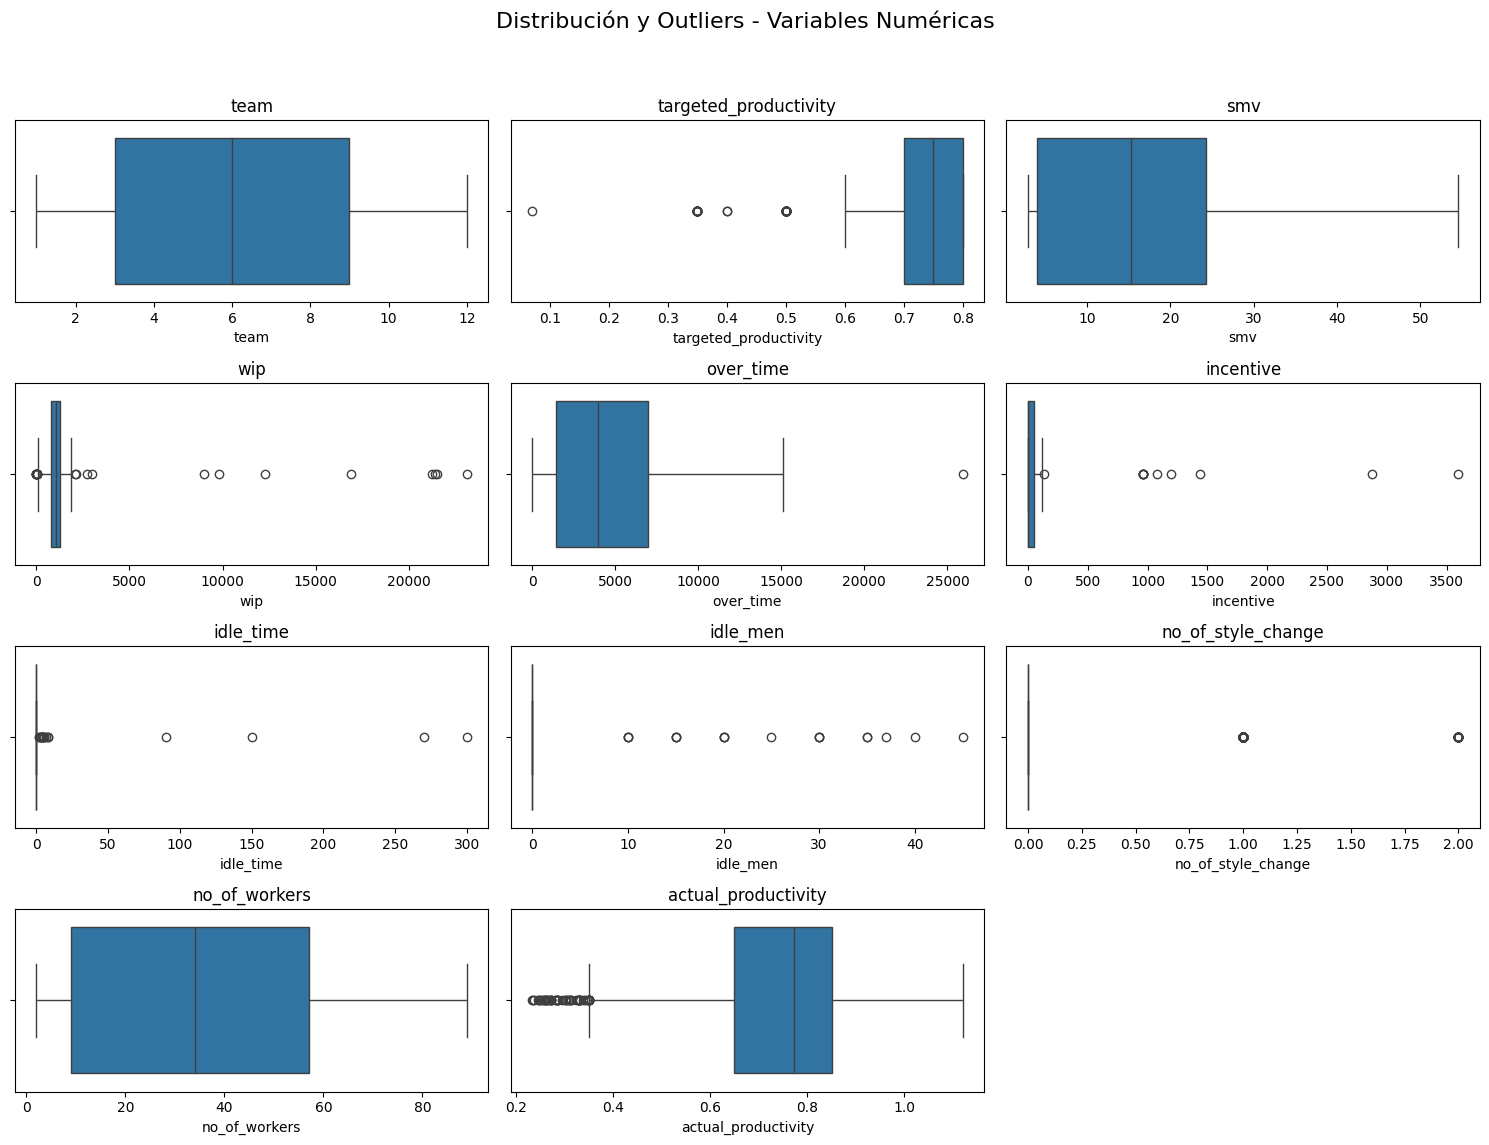

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def graficar_outliers_matriz(df, n_cols=3):
    """Genera boxplots organizados en subgráficos para las variables numéricas."""
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    n = len(numeric_cols)
    n_rows = int(np.ceil(n / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 3))
    fig.suptitle('Distribución y Outliers - Variables Numéricas', fontsize=16)

    axes = axes.flatten()  # Para iterar fácilmente

    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f'{col}')

    # Ocultar gráficos sobrantes
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Uso
graficar_outliers_matriz(data)


## a.4 Detección multivariada de outliers con Mahalanobis

In [38]:
import numpy as np
from numpy.linalg import inv
from scipy.stats import chi2

def calcular_distancia_mahalanobis(df, alpha=0.99):
    """Retorna índices de outliers multivariados usando distancia de Mahalanobis."""
    df_numeric = df.select_dtypes(include=["float64", "int64"]).drop(columns=["actual_productivity"], errors='ignore')
    x = df_numeric - df_numeric.mean()
    cov = np.cov(x.values.T)
    inv_cov = inv(cov)
    m_dist = np.diag(np.dot(np.dot(x, inv_cov), x.T))
    threshold = chi2.ppf(alpha, df_numeric.shape[1])
    outliers_idx = np.where(m_dist > threshold)[0]
    return outliers_idx

# Mostrar
outliers_multivariados = calcular_distancia_mahalanobis(data)
print(f"Outliers multivariados detectados: {len(outliers_multivariados)}")

Outliers multivariados detectados: 0


## a.5 Conversión de variables categóricas a dummies

In [39]:
def convertir_dummies(df):
    """Convierte variables categóricas a dummies."""
    return pd.get_dummies(df, drop_first=True)

# Mostrar
data = convertir_dummies(data)
data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,False,False,False,False,True,False,False,True,False,False
1,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,False,False,False,True,False,False,False,True,False,False
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,False,False,False,False,True,False,False,True,False,False
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,False,False,False,False,True,False,False,True,False,False
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,...,False,False,False,False,False,False,False,False,False,True
1193,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,...,False,False,False,False,False,False,False,False,False,True
1194,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,...,False,False,False,False,False,False,False,False,False,True
1195,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,...,False,False,False,False,False,False,False,False,False,True


In [40]:
# a.5.1 Imputación de valores faltantes
def imputar_nulos(df):
    """Imputa valores nulos con la media en columnas numéricas."""
    return df.fillna(df.mean(numeric_only=True))

# Aplicamos imputación
data = imputar_nulos(data)

## a.6 Escalamiento de variables numéricas

In [41]:
from sklearn.preprocessing import StandardScaler

def escalar_datos(df, target):
    """Escala todas las variables predictoras, separando la variable objetivo."""
    X = df.drop(columns=[target])
    y = df[target]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, y

# Aplicamos
X_scaled, y = escalar_datos(data, "actual_productivity")

#  b. Separación de datos y ensamblaje de modelos

## b.1 División de los datos en entrenamiento y prueba

In [42]:
from sklearn.model_selection import train_test_split

def dividir_datos(X, y, test_size=0.2, seed=42):
    """Divide los datos en entrenamiento y prueba."""
    return train_test_split(X, y, test_size=test_size, random_state=seed)

# Aplicamos
X_train, X_test, y_train, y_test = dividir_datos(X_scaled, y)

## b.2 Definición de modelos base con hiperparámetros

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def definir_modelos_base():
    """Devuelve una lista de tuplas (nombre, modelo) con hiperparámetros definidos."""
    modelos = [
        ("k-NN", KNeighborsRegressor(n_neighbors=6)),
        ("SVM", SVR(C=50, gamma='scale')),
        ("Regresión Lineal", LinearRegression()),
        ("Árbol", DecisionTreeRegressor(max_depth=5, random_state=0)),
        ("Random Forest", RandomForestRegressor(n_estimators=200, random_state=0))
    ]
    return modelos

modelos_base = definir_modelos_base()
modelos_base

[('k-NN', KNeighborsRegressor(n_neighbors=6)),
 ('SVM', SVR(C=50)),
 ('Regresión Lineal', LinearRegression()),
 ('Árbol', DecisionTreeRegressor(max_depth=5, random_state=0)),
 ('Random Forest', RandomForestRegressor(n_estimators=200, random_state=0))]

## b.3 Creación de modelos de ensamblaje (voting, bagging, boosting, stacking)

In [44]:
from sklearn.ensemble import (
    VotingRegressor, BaggingRegressor,
    AdaBoostRegressor, StackingRegressor
)

def definir_modelos_ensamblaje(modelos_base):
    """Devuelve una lista de modelos de ensamblaje usando los modelos base."""
    ensembles = [
        ("Voting", VotingRegressor(estimators=modelos_base)),
        ("Bagging", BaggingRegressor(n_estimators=100, random_state=0)),
        ("Boosting", AdaBoostRegressor(n_estimators=100, learning_rate=1.0, random_state=0)),
        ("Stacking", StackingRegressor(estimators=modelos_base, final_estimator=LinearRegression()))
    ]
    return ensembles

modelos_ensamblaje = definir_modelos_ensamblaje(modelos_base)
modelos_ensamblaje

[('Voting',
  VotingRegressor(estimators=[('k-NN', KNeighborsRegressor(n_neighbors=6)),
                              ('SVM', SVR(C=50)),
                              ('Regresión Lineal', LinearRegression()),
                              ('Árbol',
                               DecisionTreeRegressor(max_depth=5,
                                                     random_state=0)),
                              ('Random Forest',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=0))])),
 ('Bagging', BaggingRegressor(n_estimators=100, random_state=0)),
 ('Boosting', AdaBoostRegressor(n_estimators=100, random_state=0)),
 ('Stacking',
  StackingRegressor(estimators=[('k-NN', KNeighborsRegressor(n_neighbors=6)),
                                ('SVM', SVR(C=50)),
                                ('Regresión Lineal', LinearRegression()),
                                ('Árbol',
                          

## b.4 Evaluación con validación cruzada y prueba final

In [45]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Métricas para validación cruzada
metricas = {
    "MSE": "neg_mean_squared_error",
    "RMSE": "neg_root_mean_squared_error",
    "MAE": "neg_mean_absolute_error",
    "R2": "r2"
}

def evaluar_modelo(modelo, nombre, X_train, y_train, X_test, y_test):
    """Entrena, evalúa con CV y prueba, mostrando métricas clave."""
    print(f"\n▶ Entrenando modelo: {nombre}")

    # Validación cruzada
    resultados = cross_validate(modelo, X_train, y_train, cv=7, scoring=metricas, n_jobs=-1)
    print(f"CV | MSE: {-np.mean(resultados['test_MSE']):.3f} | RMSE: {-np.mean(resultados['test_RMSE']):.3f} | "
          f"MAE: {-np.mean(resultados['test_MAE']):.3f} | R²: {np.mean(resultados['test_R2']):.3f}")

    # Prueba final
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    print(f"Test | MSE: {mean_squared_error(y_test, pred):.3f} | RMSE: {mean_squared_error(y_test, pred)**0.5:.3f} | "
          f"MAE: {mean_absolute_error(y_test, pred):.3f} | R²: {r2_score(y_test, pred):.3f}")

##  b.5 Aplicación sobre todos los modelos (base + ensamblajes)

In [46]:
# Evaluar todos los modelos
todos_los_modelos = modelos_base + modelos_ensamblaje

for nombre, modelo in todos_los_modelos:
    evaluar_modelo(modelo, nombre, X_train, y_train, X_test, y_test)


▶ Entrenando modelo: k-NN
CV | MSE: 0.026 | RMSE: 0.161 | MAE: 0.117 | R²: 0.164
Test | MSE: 0.024 | RMSE: 0.156 | MAE: 0.114 | R²: 0.078

▶ Entrenando modelo: SVM
CV | MSE: 0.030 | RMSE: 0.172 | MAE: 0.124 | R²: 0.024
Test | MSE: 0.024 | RMSE: 0.155 | MAE: 0.112 | R²: 0.099

▶ Entrenando modelo: Regresión Lineal
CV | MSE: 0.022 | RMSE: 0.148 | MAE: 0.108 | R²: 0.288
Test | MSE: 0.022 | RMSE: 0.149 | MAE: 0.108 | R²: 0.168

▶ Entrenando modelo: Árbol
CV | MSE: 0.022 | RMSE: 0.148 | MAE: 0.096 | R²: 0.288
Test | MSE: 0.018 | RMSE: 0.134 | MAE: 0.087 | R²: 0.323

▶ Entrenando modelo: Random Forest
CV | MSE: 0.017 | RMSE: 0.128 | MAE: 0.078 | R²: 0.467
Test | MSE: 0.015 | RMSE: 0.121 | MAE: 0.074 | R²: 0.451

▶ Entrenando modelo: Voting
CV | MSE: 0.018 | RMSE: 0.133 | MAE: 0.089 | R²: 0.429
Test | MSE: 0.015 | RMSE: 0.122 | MAE: 0.082 | R²: 0.442

▶ Entrenando modelo: Bagging
CV | MSE: 0.017 | RMSE: 0.128 | MAE: 0.078 | R²: 0.467
Test | MSE: 0.014 | RMSE: 0.119 | MAE: 0.073 | R²: 0.464



# c. Evaluación del mejor modelo y justificación

## c.1 Recolección y organización de métricas
Vamos a organizar las métricas obtenidas en una tabla para facilitar la comparación. Crearemos una función para recolectar y almacenar las métricas claves de prueba:

In [47]:
def recolectar_metricas(nombre, modelo, X_train, y_train, X_test, y_test):
    """Devuelve un diccionario con las métricas de evaluación del modelo en el set de prueba."""
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    return {
        'Modelo': nombre,
        'MSE': mean_squared_error(y_test, pred),
        'RMSE': mean_squared_error(y_test, pred)**0.5,
        'MAE': mean_absolute_error(y_test, pred),
        'R2': r2_score(y_test, pred)
    }


# Evaluar todos y guardar en tabla
resultados_tabla = []
for nombre, modelo in todos_los_modelos:
    resultados_tabla.append(recolectar_metricas(nombre, modelo, X_train, y_train, X_test, y_test))

# Mostrar como DataFrame ordenado por R2 (de mejor a peor)
df_resultados = pd.DataFrame(resultados_tabla).sort_values(by='R2', ascending=False)
df_resultados.reset_index(drop=True, inplace=True)
df_resultados


,Modelo,MSE,RMSE,MAE,R2
0,Bagging,0.014230,0.119290,0.072802,0.464077
1,Stacking,0.014388,0.119949,0.075395,0.458134
2,Random Forest,0.014574,0.120724,0.074246,0.451114
3,Voting,0.014822,0.121745,0.081897,0.441786
4,Árbol,0.017964,0.134030,0.087334,0.323447
5,Boosting,0.019816,0.140768,0.105424,0.253717
6,Regresión Lineal,0.022087,0.148618,0.108453,0.168168
7,SVM,0.023935,0.154708,0.112268,0.098590
8,k-NN,0.024484,0.156472,0.113629,0.077919


##  c.2 Visualización comparativa

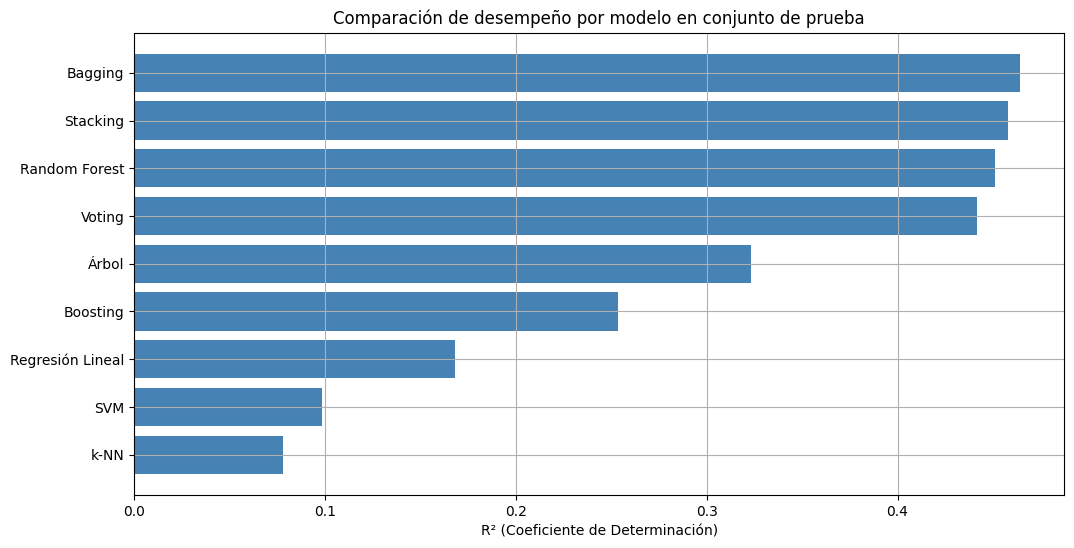

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(df_resultados['Modelo'], df_resultados['R2'], color='steelblue')
plt.xlabel('R² (Coeficiente de Determinación)')
plt.title('Comparación de desempeño por modelo en conjunto de prueba')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

## c.3 Elección del mejor modelo y justificación
Modelo seleccionado:
Según la tabla y gráfico generado, el modelo con mayor R² en el conjunto de prueba es:

In [49]:
modelo_top = df_resultados.iloc[0]
print(f" Mejor modelo: {modelo_top['Modelo']} | R² = {modelo_top['R2']:.3f}")

 Mejor modelo: Bagging | R² = 0.464


 Justificación:

* Este modelo presentó la mayor capacidad de generalización sobre los datos de prueba.

* Mantuvo un buen equilibrio entre error absoluto y cuadrático.

* El R² cercano a 0.46 indica que explica un 46% de la variabilidad en la productividad real.